This notebook generates files for each class in the '/content/drive/My Drive/19 Fall/CSE 569/Project/cifar/labeled' directory.

There are 50000 images in the train data. There are 10 classes and each class contains 5000 images. So 20 files are generated for the train data. One file for each class and another file for each class label.

There are 10000 images in the test data. There are 10 classes and each class contains 1000 images. So 20 files are generated for the test data. One file for each class and another file for each class label.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf

In [0]:
ROOT = '/content/drive/My Drive/19 Fall/CSE 569/Project'

In [0]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
X_train = np.empty((0, 32, 32, 3))
X_train_labels = []

X_test = np.empty((0, 32, 32, 3))
X_test_labels = []

In [0]:
print(X_train.shape)
print(X_test.shape)

(0, 32, 32, 3)
(0, 32, 32, 3)


In [0]:
for i in range(5):
  with open(ROOT + '/cifar/data_batch_' + str(i+1), mode='rb') as file:
    batch = pickle.load(file, encoding='latin1')
    X_train_batch = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    if X_train.size == 0:
      X_train = X_train_batch
    else:
      X_train = np.concatenate((X_train, X_train_batch), axis=0)
    X_train_labels.extend(batch['labels'])

In [0]:
print(X_train.shape, len(X_train_labels))

(50000, 32, 32, 3) 50000


In [0]:
with open(ROOT + '/cifar/test_batch', mode='rb') as file:
    test_batch = pickle.load(file, encoding='latin1')
    X_test_batch = test_batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    if X_test.size == 0:
      X_test = X_test_batch
    else:
      X_test = np.concatenate((X_test, X_test_batch), axis=0)
    X_test_labels.extend(test_batch['labels'])

In [0]:
print(X_test.shape, len(X_test_labels))

(10000, 32, 32, 3) 10000


In [0]:
label_counts = dict(zip(*np.unique(X_train_labels, return_counts=True)))
for key, value in label_counts.items():
    print(key, label_names[key], value)

0 airplane 5000
1 automobile 5000
2 bird 5000
3 cat 5000
4 deer 5000
5 dog 5000
6 frog 5000
7 horse 5000
8 ship 5000
9 truck 5000



Example of Image 47000:
Image - Min Value: 21 Max Value: 254
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


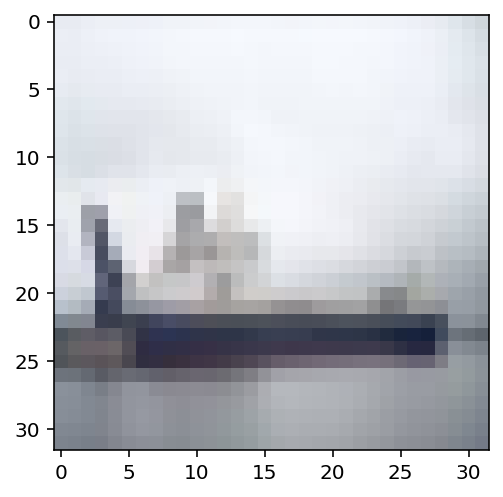

In [0]:
sample_id = 47000
sample_image = X_train[sample_id]
sample_label = X_train_labels[sample_id]
print('\nExample of Image {}:'.format(sample_id))
print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
print('Image - Shape: {}'.format(sample_image.shape))
print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
plt.imshow(sample_image)

In [0]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [0]:
def one_hot_encode(x):
    """
        argument
            - x: a list of labels
        return
            - one hot encoding matrix (number of labels, number of class)
    """
    encoded = np.zeros((len(x), 10))
    
    for idx, val in enumerate(x):
        encoded[idx][val] = 1
    
    return encoded

In [0]:
def one_hot_decode(x):
  decoded_labels = []
  for row in range(x.shape[0]):
    for pos in range(x.shape[1]):
      if x[row][pos] == 1:
        decoded_labels.append(pos)
        break
  return decoded_labels

In [0]:
X_train = normalize(X_train)
print(X_train.shape)
y_train = one_hot_encode(X_train_labels)
y_train = np.asarray(y_train)
print(y_train.shape)

X_test = normalize(X_test)
print(X_test.shape)
y_test = one_hot_encode(X_test_labels)
y_test = np.asarray(y_test)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [0]:
X_train_classes = {class_id: [] for class_id in range(len(label_names))}
y_train_classes = {class_id: [] for class_id in range(len(label_names))}

X_test_classes = {class_id: [] for class_id in range(len(label_names))}
y_test_classes = {class_id: [] for class_id in range(len(label_names))}

In [0]:
train_classes = one_hot_decode(y_train)
assert len(train_classes) == 50000
for i in range(len(train_classes)):
  class_id = train_classes[i]
  X_train_classes[class_id].append(X_train[i, :])
  y_train_classes[class_id].append(y_train[i, :])
for class_id in range(len(label_names)):
  X_train_classes[class_id] = np.array(X_train_classes[class_id])
  y_train_classes[class_id] = np.array(y_train_classes[class_id])

In [0]:
for i in range(10):
  assert X_train_classes[i].shape == (5000, 32, 32, 3)
  assert y_train_classes[i].shape == (5000, 10)

In [0]:
test_classes = one_hot_decode(y_test)
assert len(test_classes) == 10000
for i in range(len(test_classes)):
  class_id = test_classes[i]
  X_test_classes[class_id].append(X_test[i, :])
  y_test_classes[class_id].append(y_test[i, :])
for class_id in range(len(label_names)):
  X_test_classes[class_id] = np.array(X_test_classes[class_id])
  y_test_classes[class_id] = np.array(y_test_classes[class_id])

In [0]:
for i in range(10):
  assert X_test_classes[i].shape == (1000, 32, 32, 3)
  assert y_test_classes[i].shape == (1000, 10)

In [0]:
for class_id in range(len(label_names)):
  pickle.dump(X_train_classes[class_id], open(ROOT + '/cifar/labeled/X_train_label' + str(class_id), 'wb'))
  pickle.dump(y_train_classes[class_id], open(ROOT + '/cifar/labeled/y_train_label' + str(class_id), 'wb'))
  pickle.dump(X_test_classes[class_id], open(ROOT + '/cifar/labeled/X_test_label' + str(class_id), 'wb'))
  pickle.dump(y_test_classes[class_id], open(ROOT + '/cifar/labeled/y_test_label' + str(class_id), 'wb'))

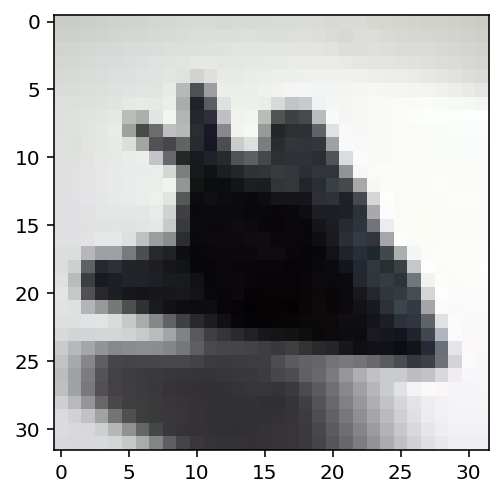

One-hot label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


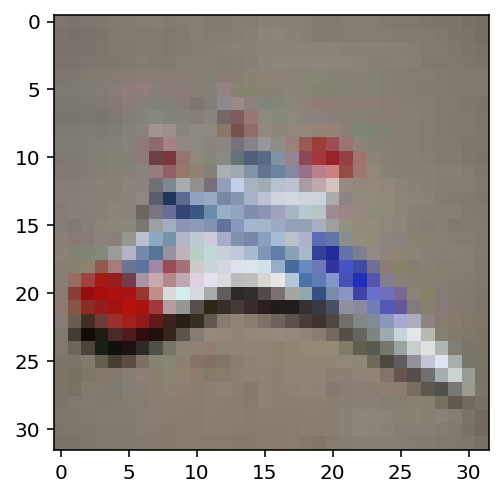

One-hot label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


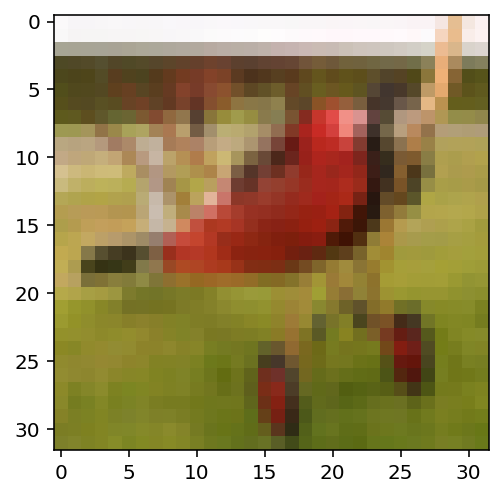

One-hot label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


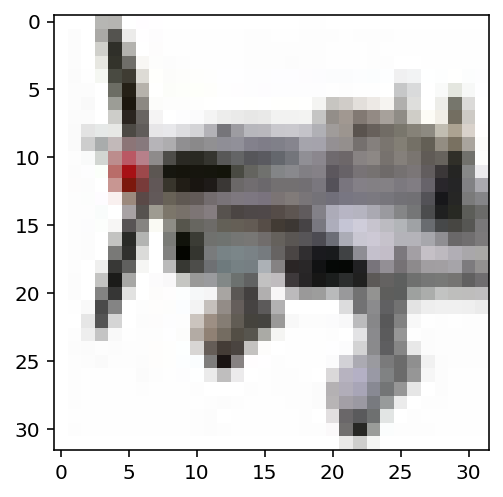

One-hot label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


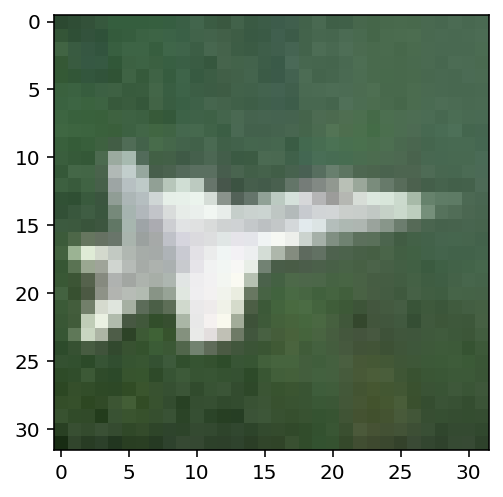

One-hot label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


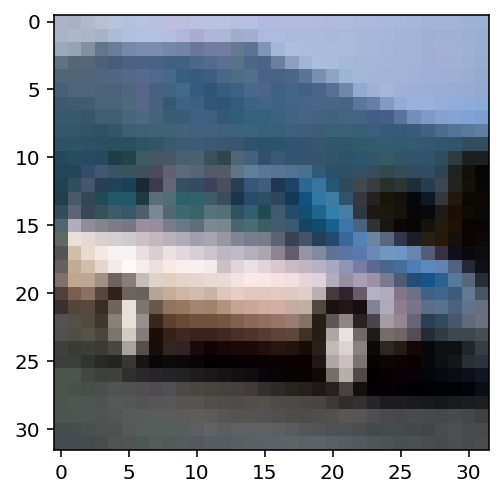

One-hot label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


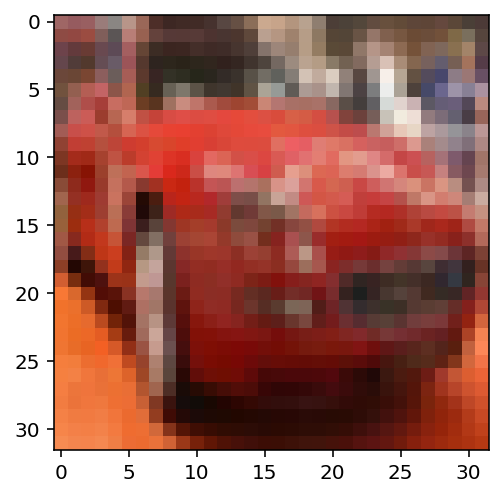

One-hot label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


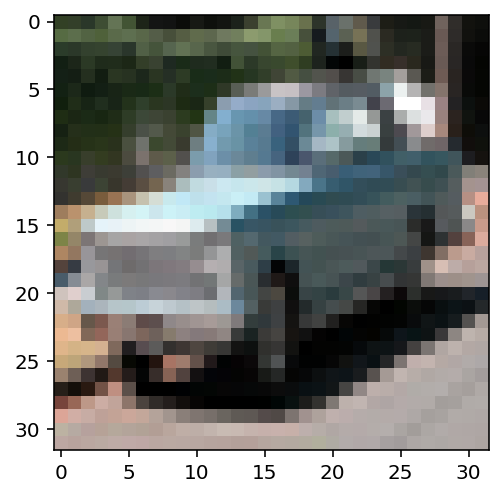

One-hot label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


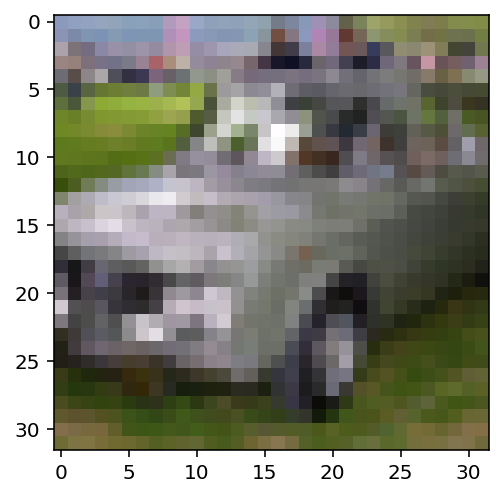

One-hot label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


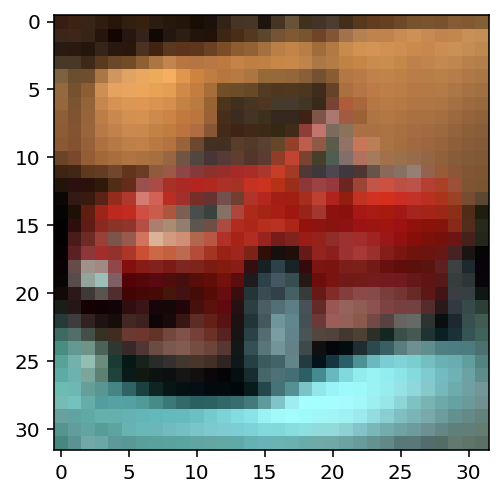

One-hot label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


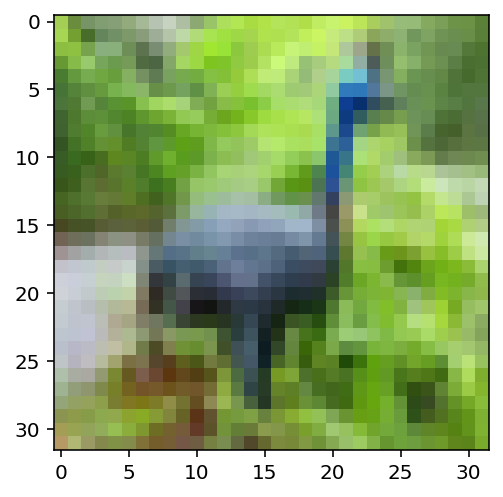

One-hot label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


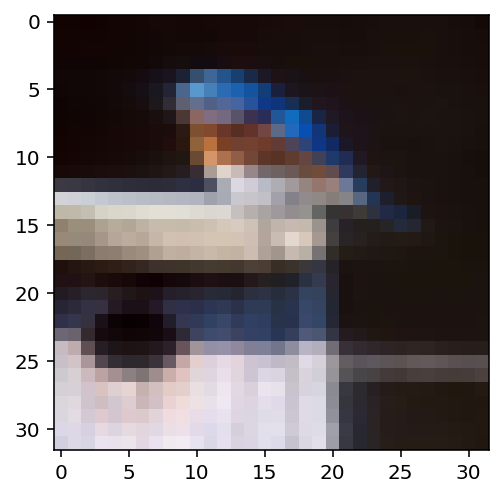

One-hot label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


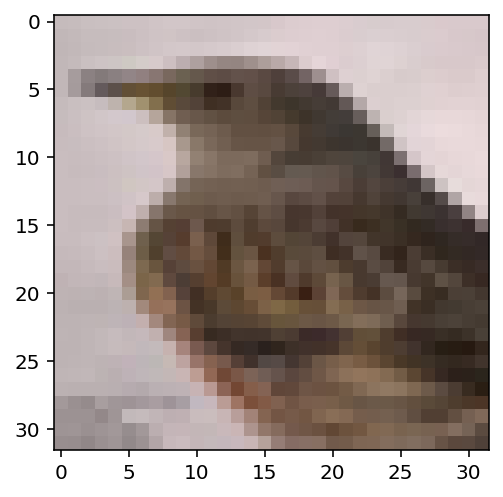

One-hot label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


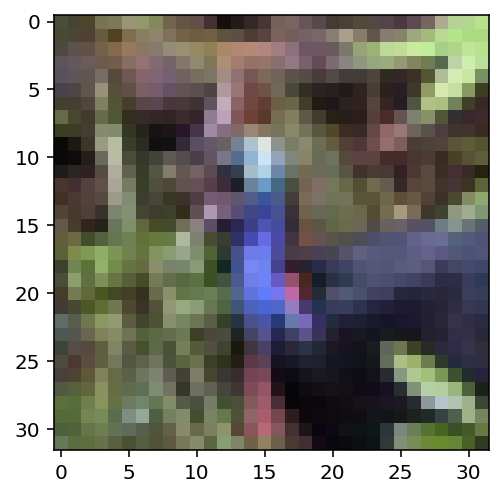

One-hot label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


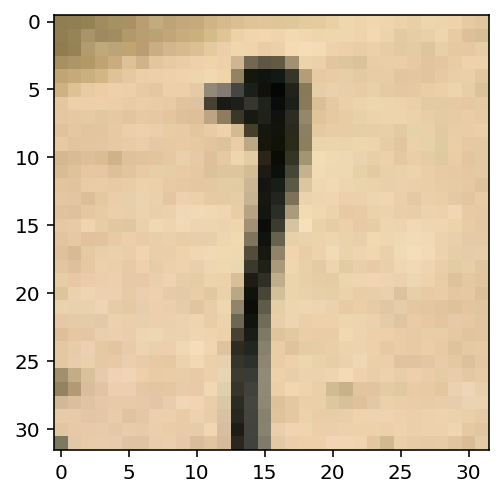

One-hot label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


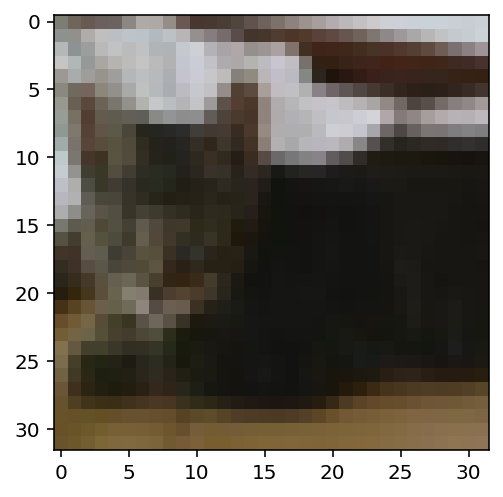

One-hot label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


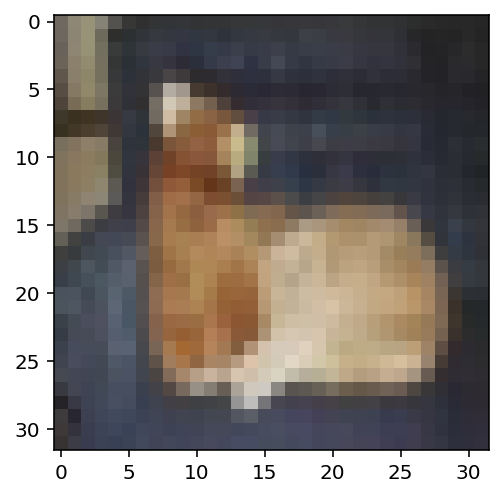

One-hot label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


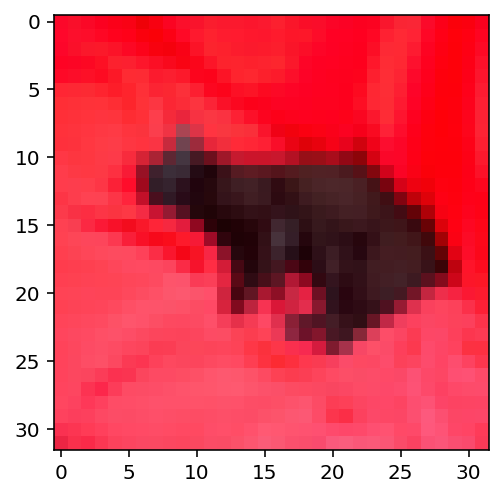

One-hot label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


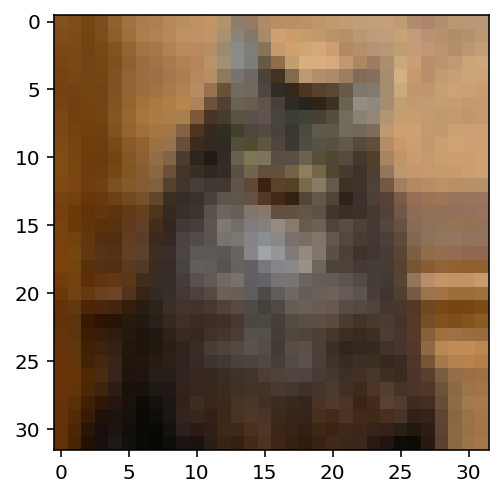

One-hot label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


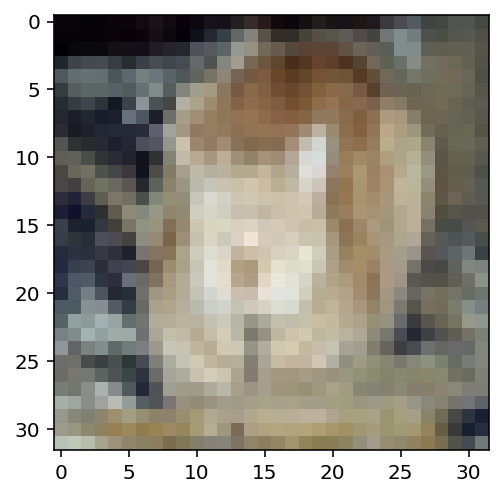

One-hot label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


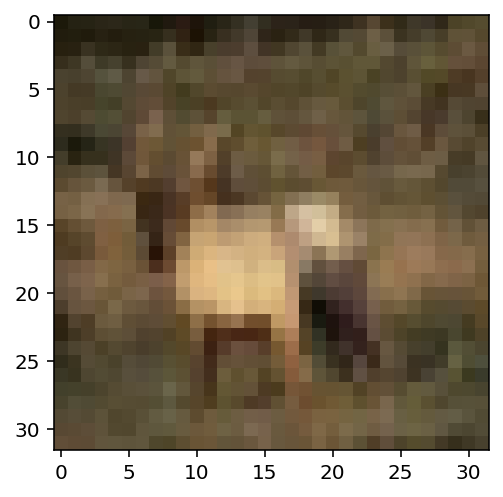

One-hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


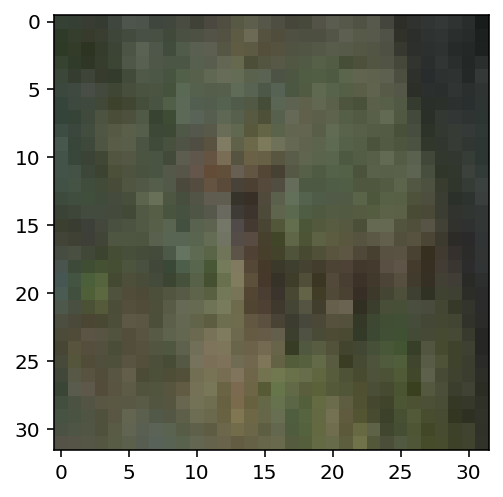

One-hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


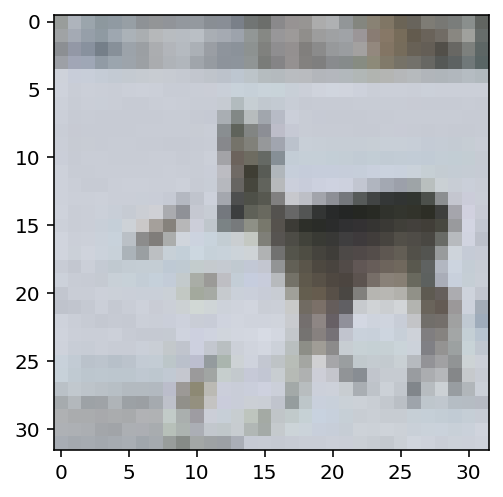

One-hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


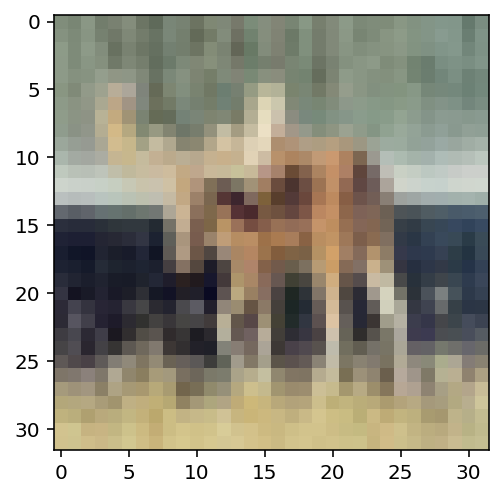

One-hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


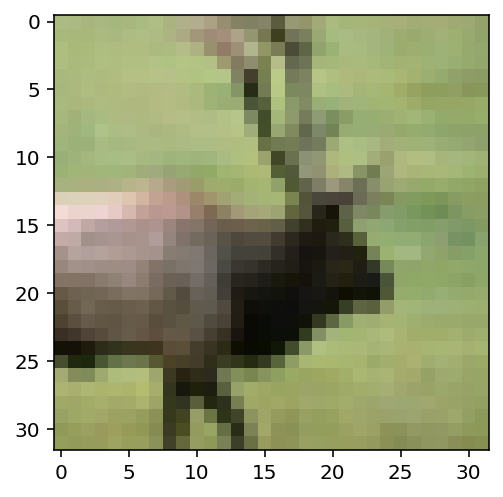

One-hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


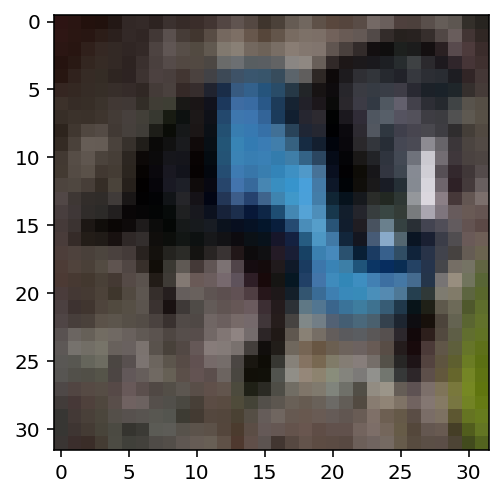

One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


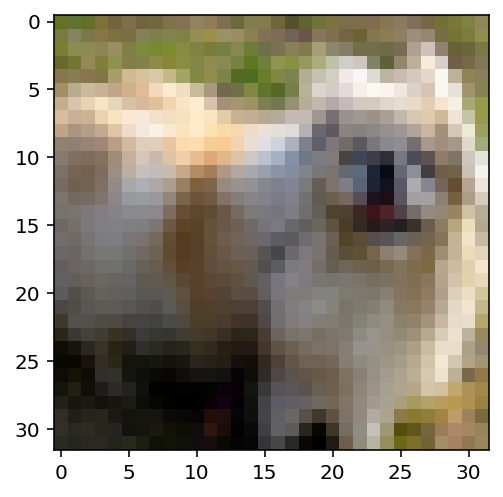

One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


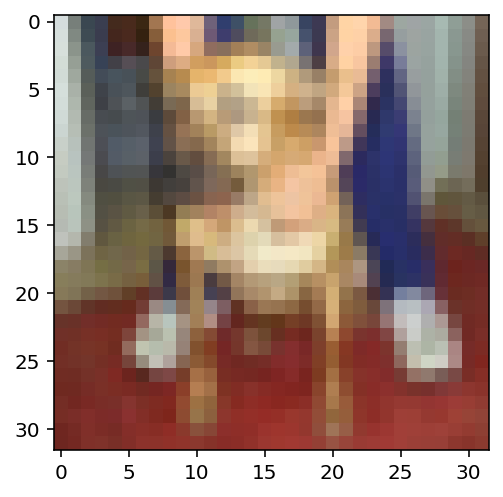

One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


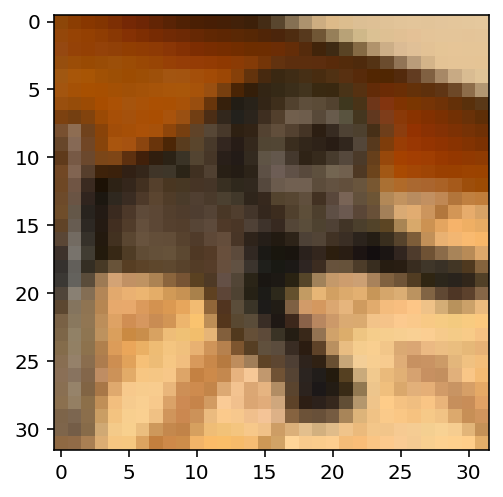

One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


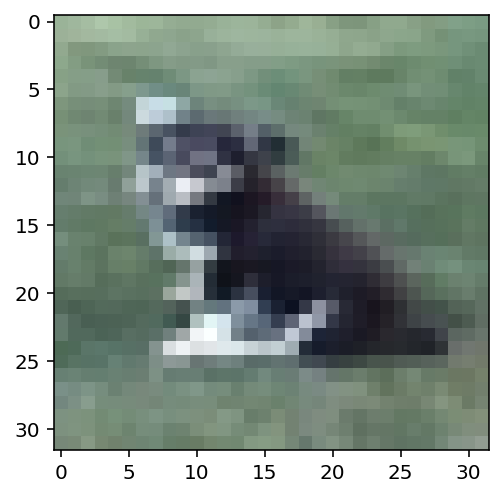

One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


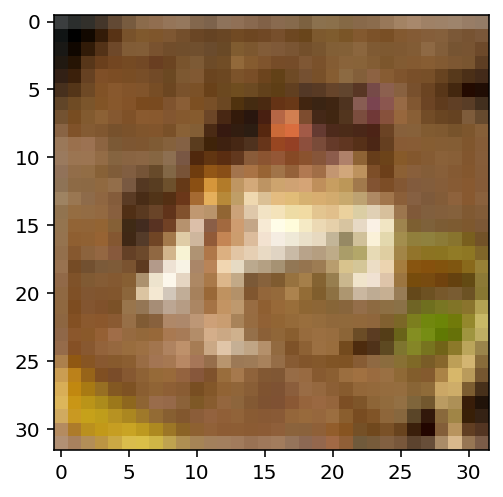

One-hot label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


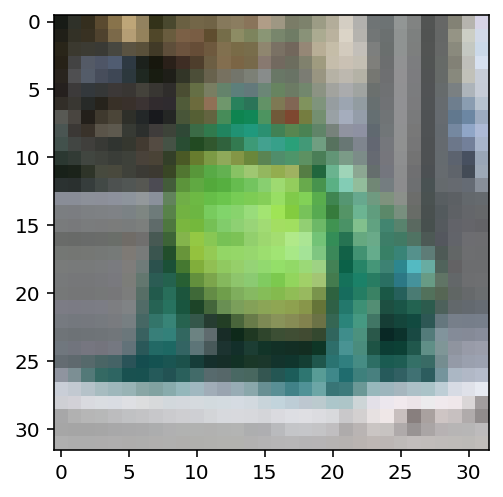

One-hot label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


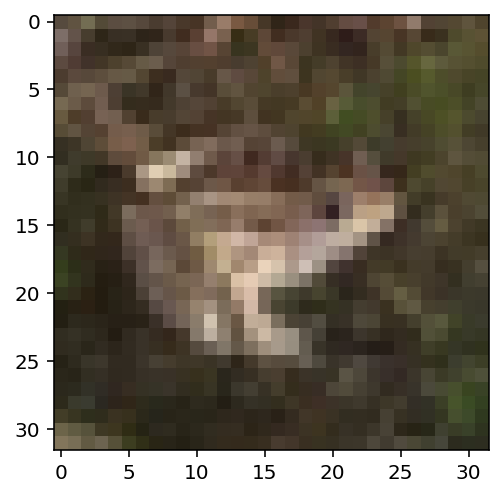

One-hot label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


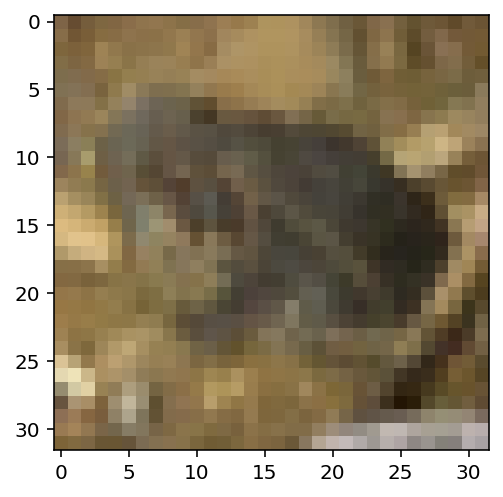

One-hot label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


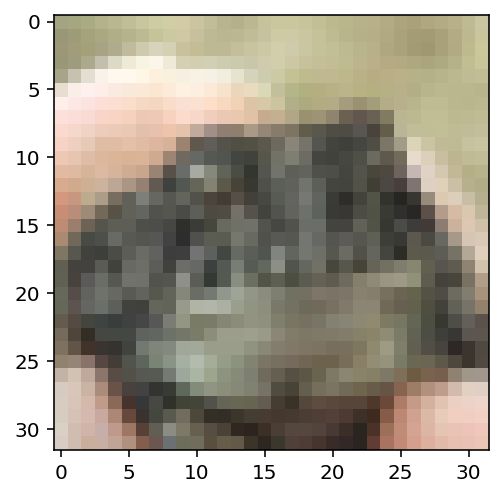

One-hot label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


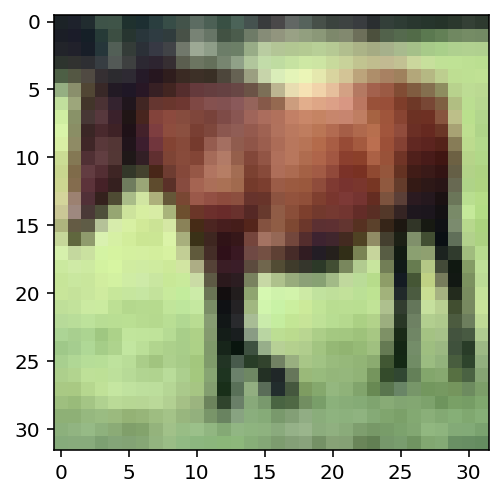

One-hot label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


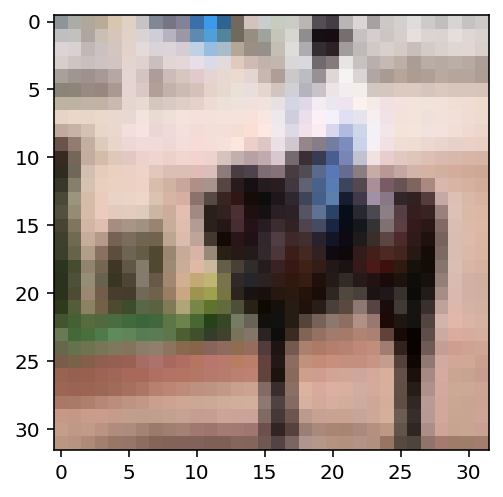

One-hot label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


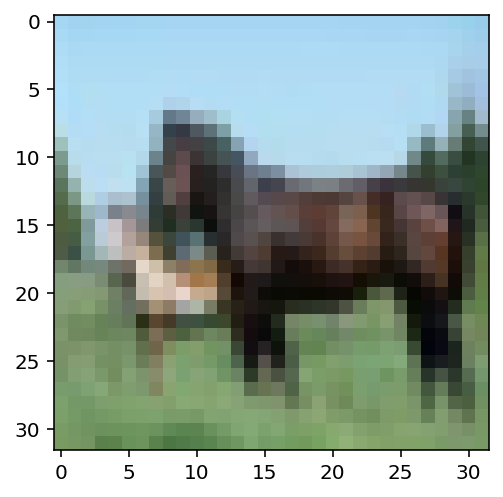

One-hot label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


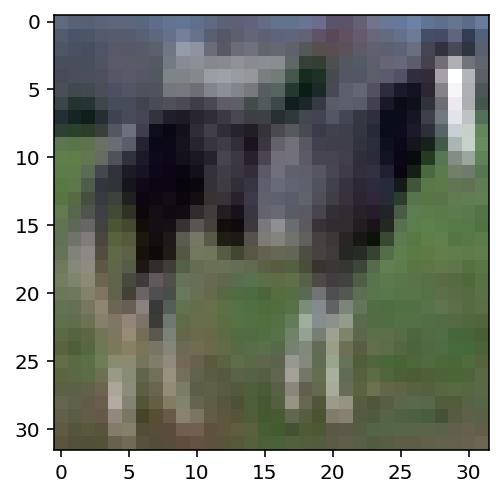

One-hot label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


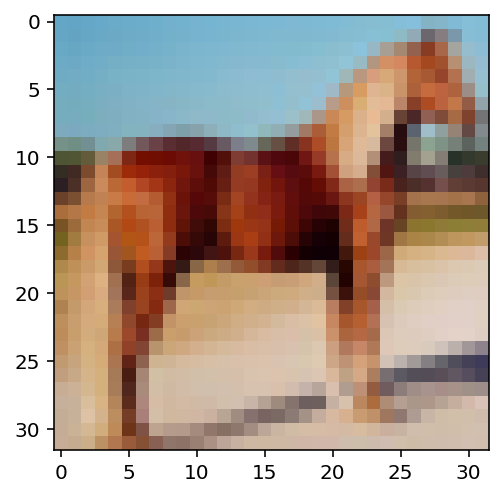

One-hot label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


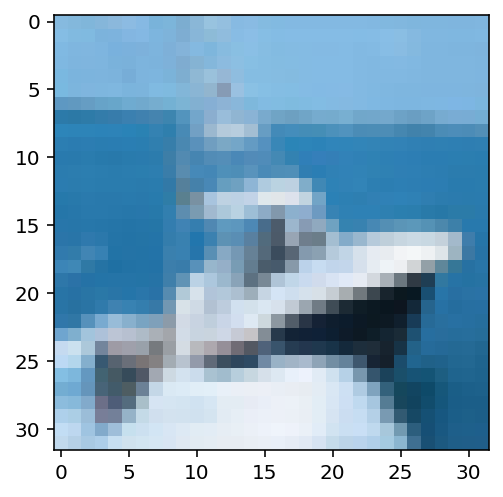

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


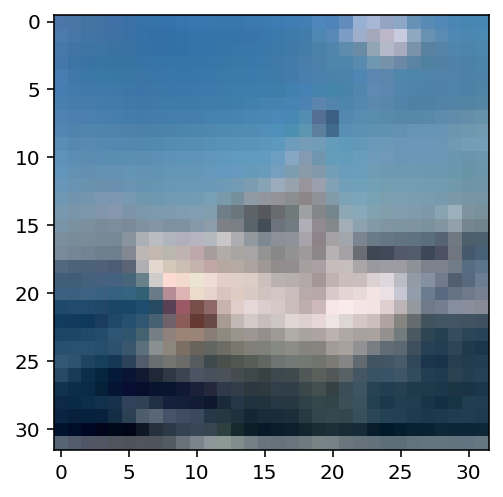

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


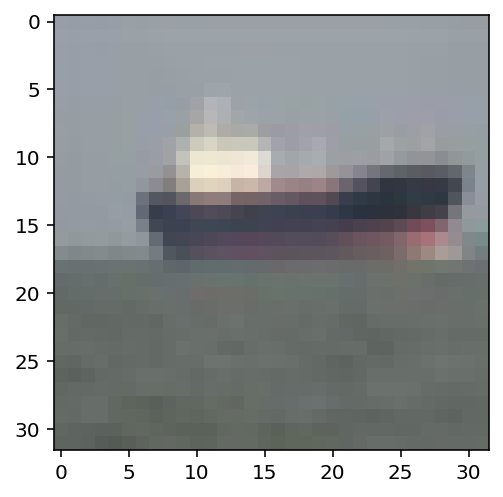

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


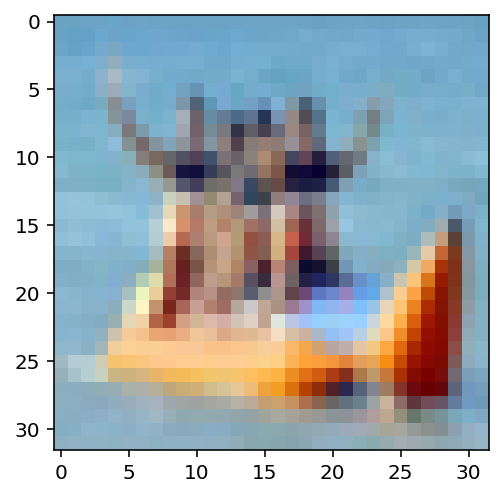

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


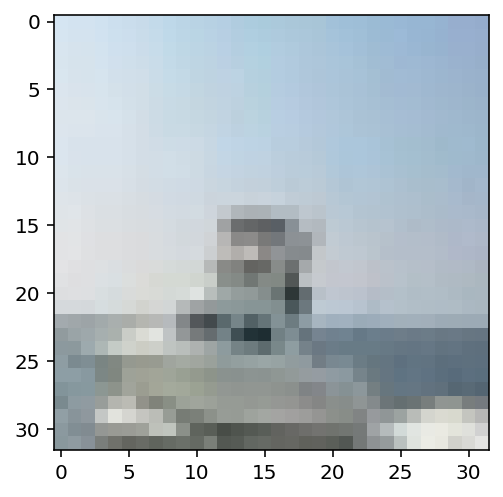

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


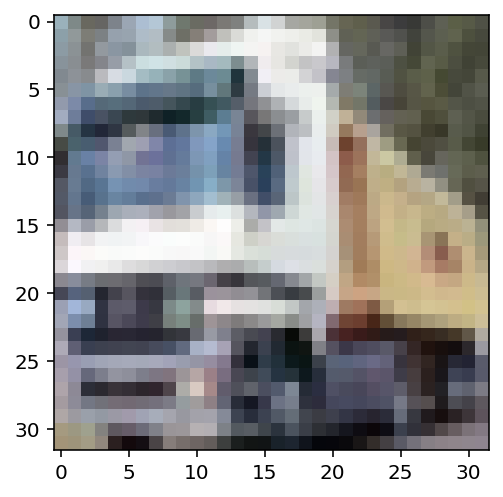

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


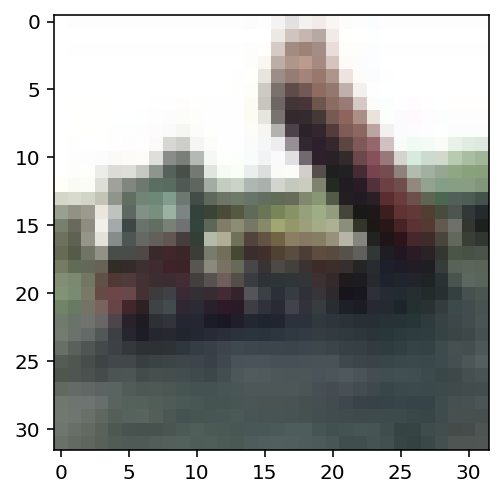

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


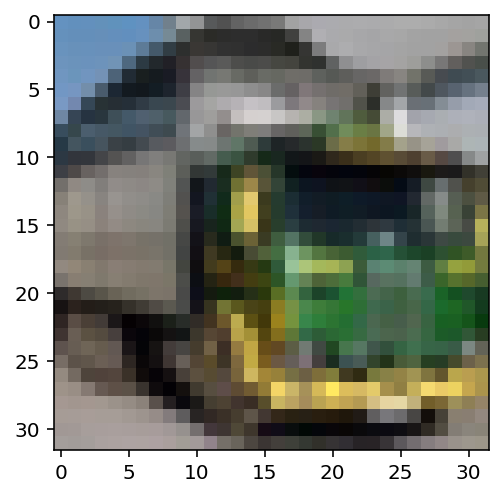

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


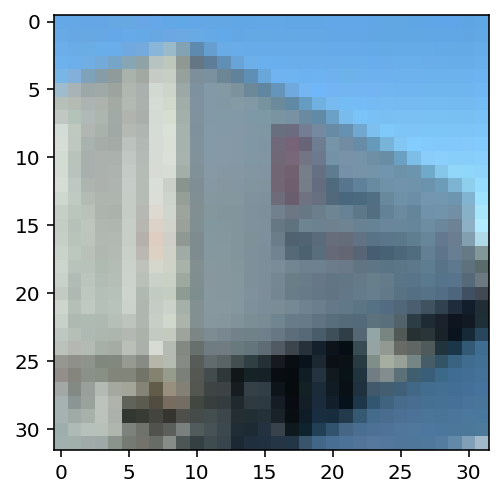

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


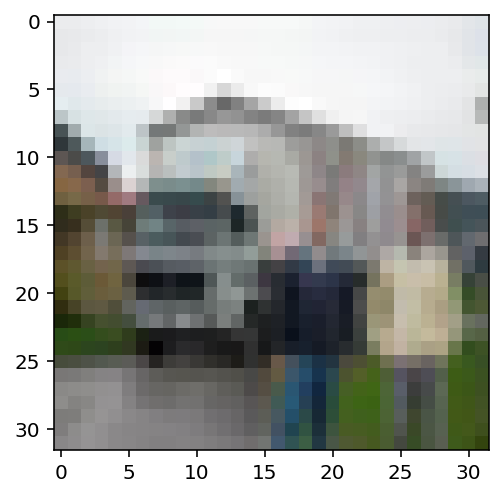

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
for class_id in range(10):
  X_train = pickle.load(open(ROOT + f'/cifar/labeled/X_train_label{class_id}', mode='rb'))
  assert X_train.shape == (5000, 32, 32, 3)
  y_train = pickle.load(open(ROOT + f'/cifar/labeled/y_train_label{class_id}', mode='rb'))
  assert y_train.shape == (5000, 10)
  for i in range(5):
    curr_img = X_train[i, :]
    plt.imshow(curr_img)
    plt.show()
    print("One-hot label:", y_train[i, :])

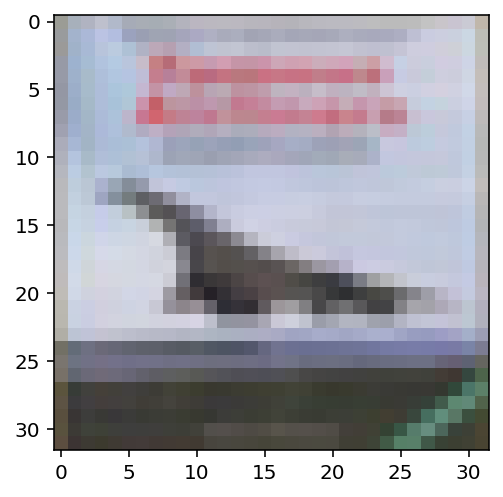

One-hot label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


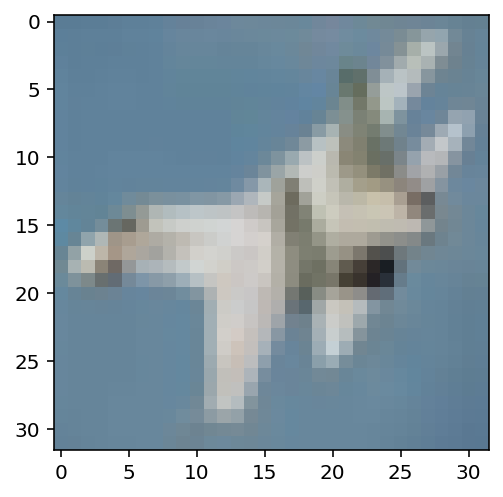

One-hot label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


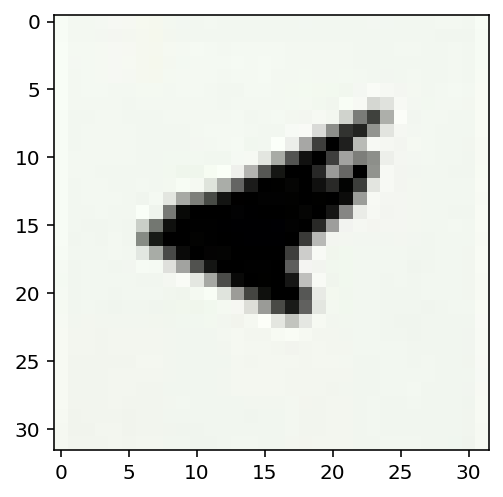

One-hot label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


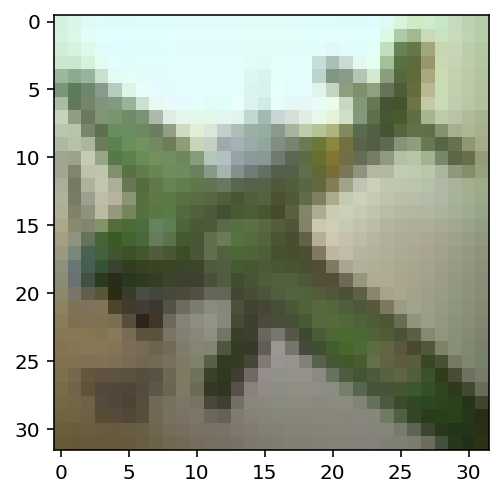

One-hot label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


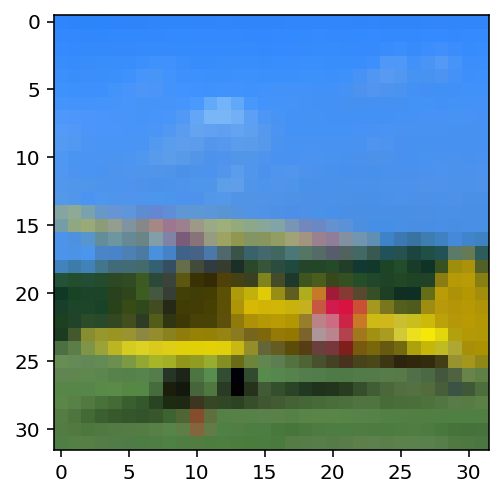

One-hot label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


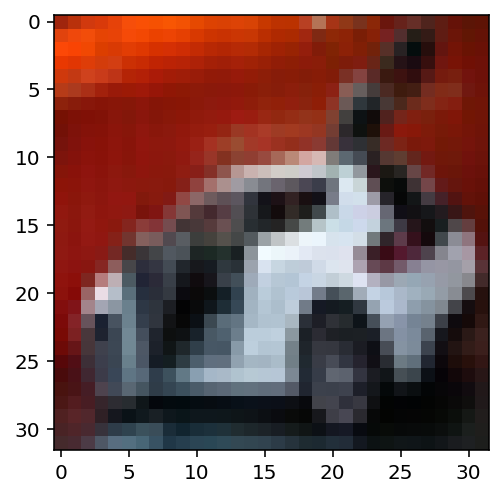

One-hot label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


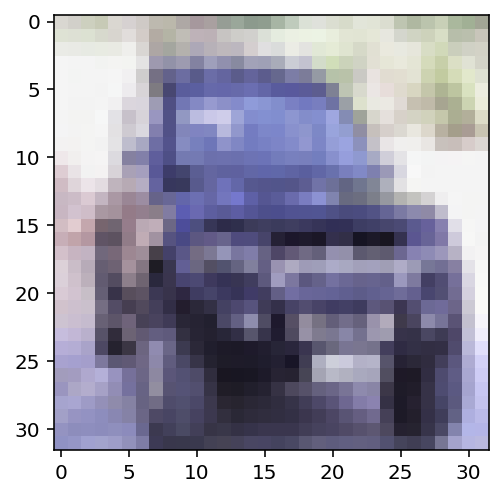

One-hot label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


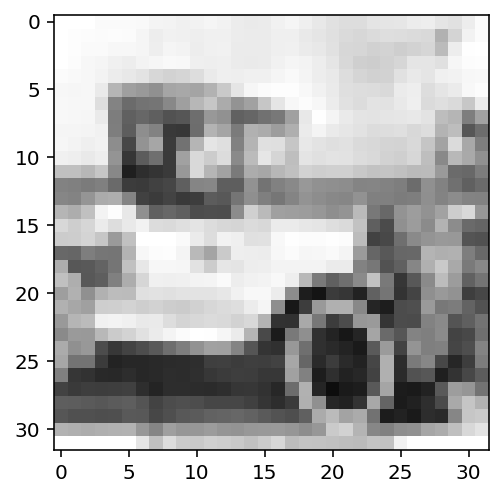

One-hot label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


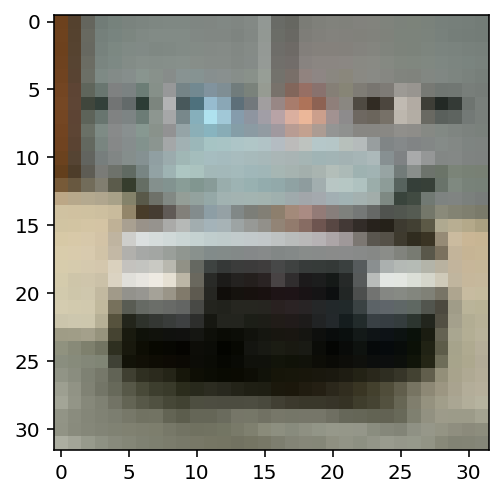

One-hot label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


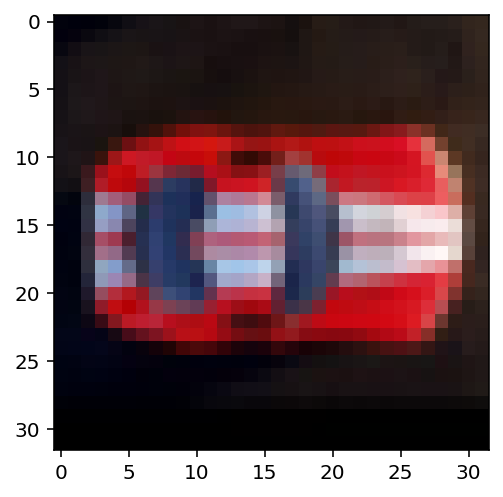

One-hot label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


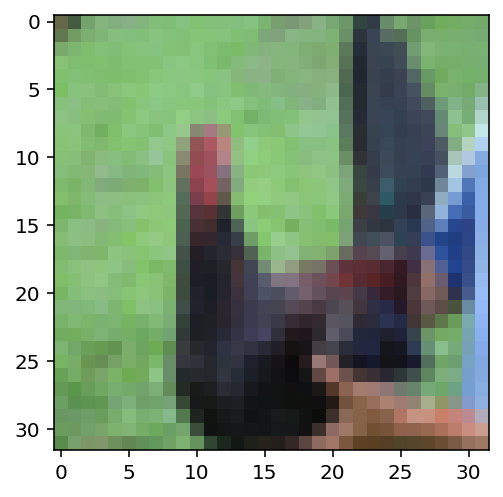

One-hot label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


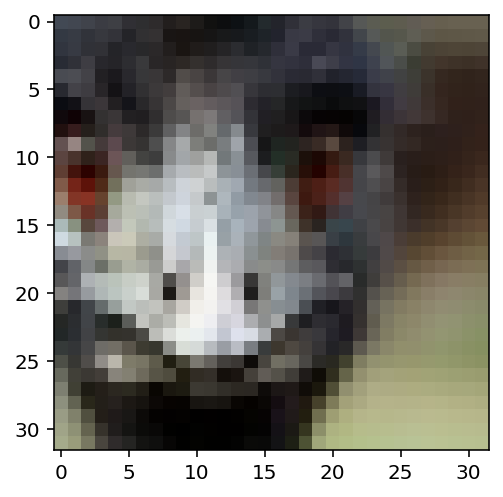

One-hot label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


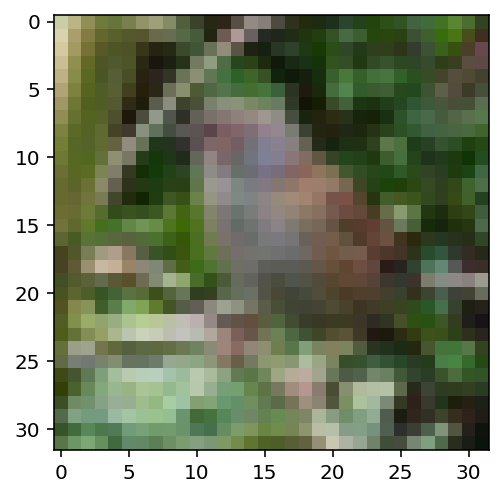

One-hot label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


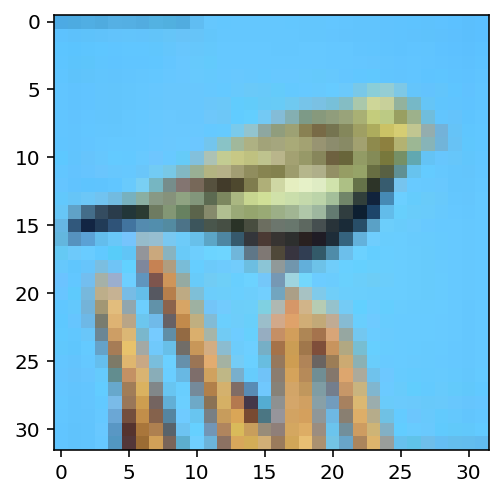

One-hot label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


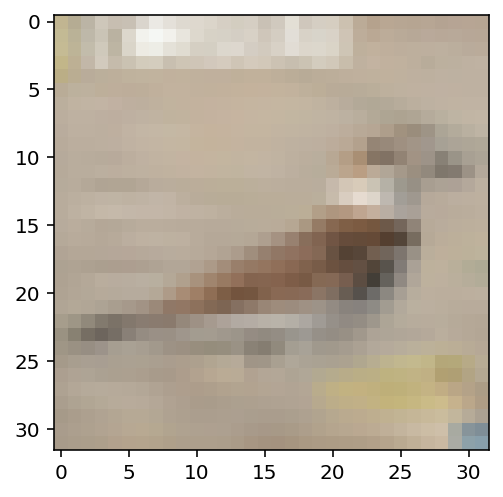

One-hot label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


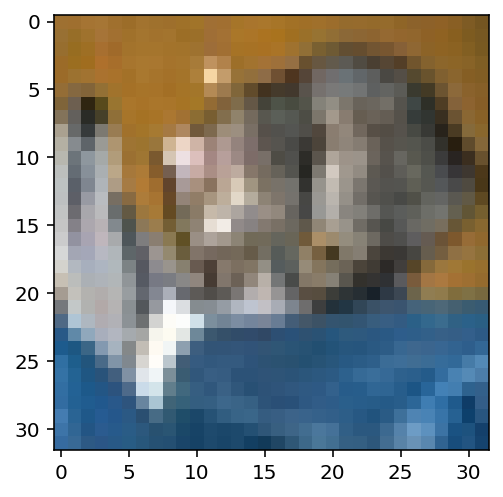

One-hot label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


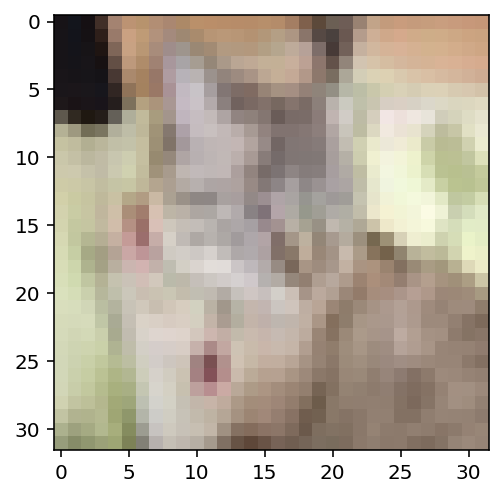

One-hot label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


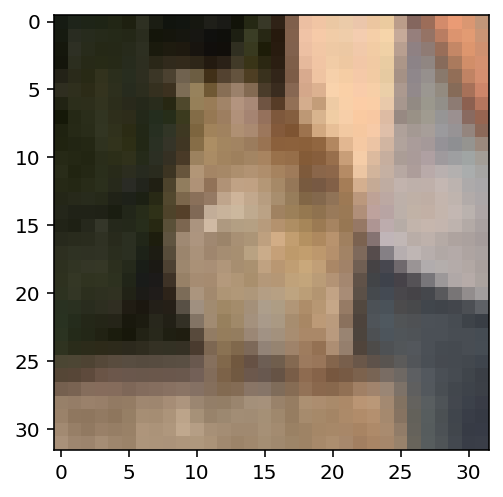

One-hot label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


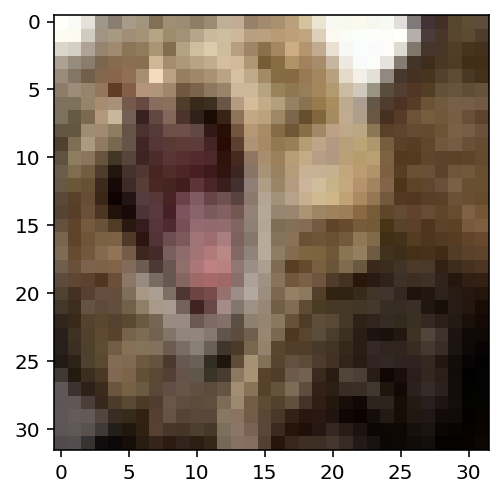

One-hot label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


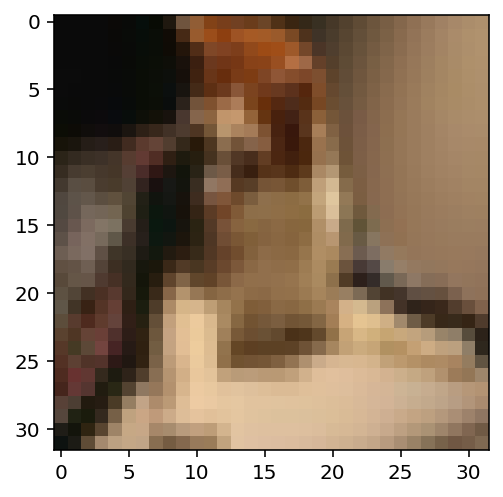

One-hot label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


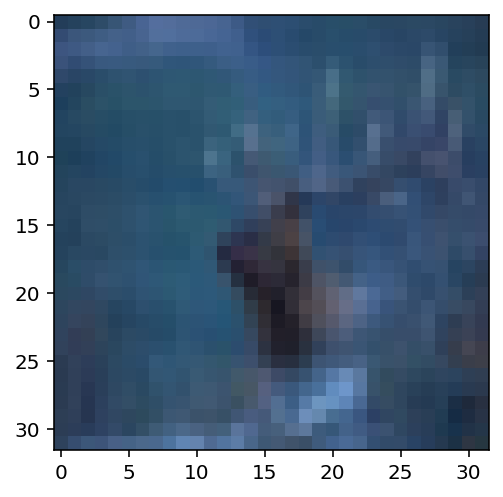

One-hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


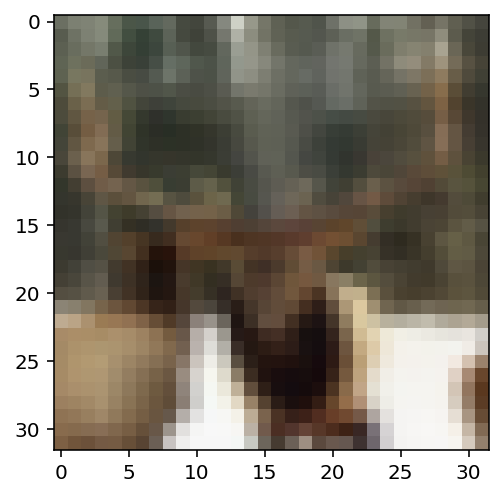

One-hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


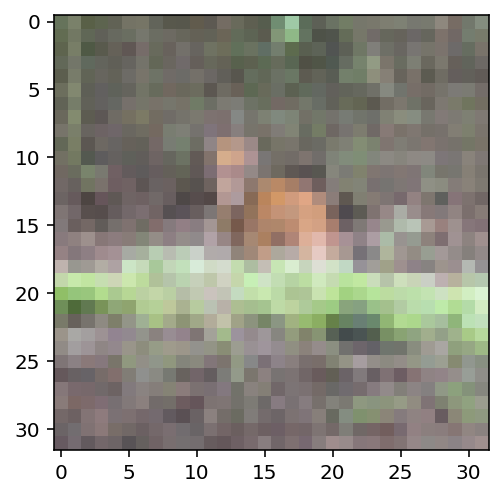

One-hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


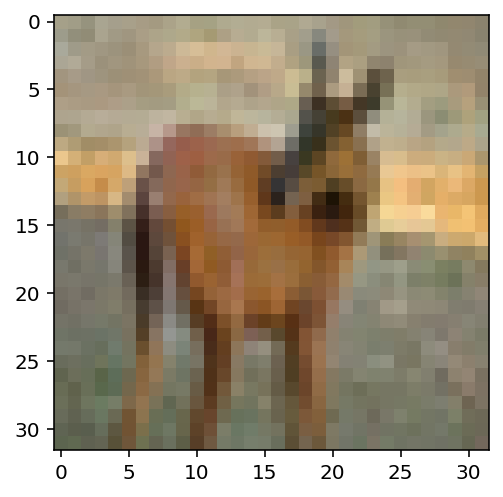

One-hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


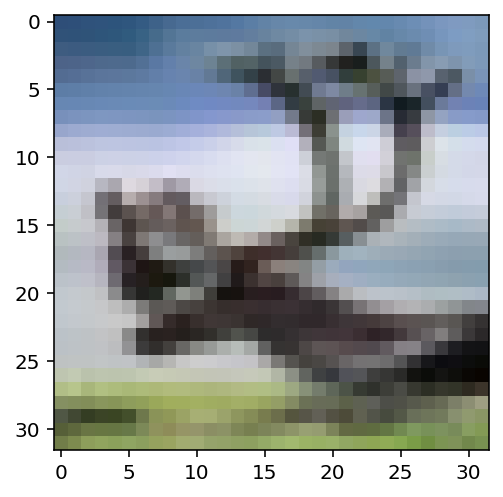

One-hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


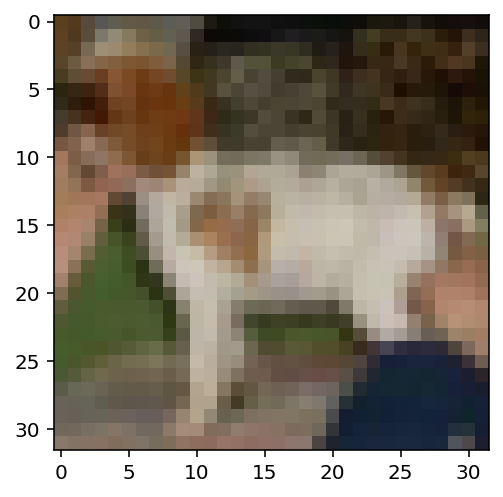

One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


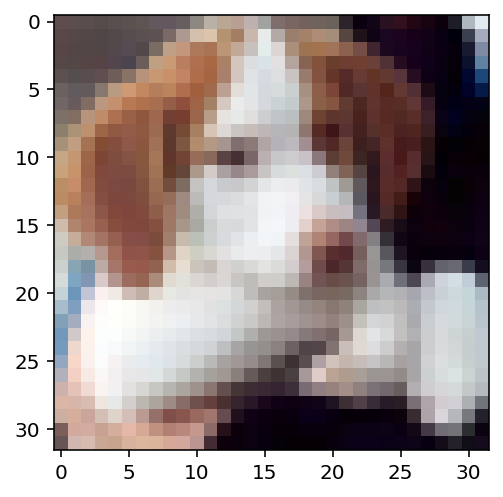

One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


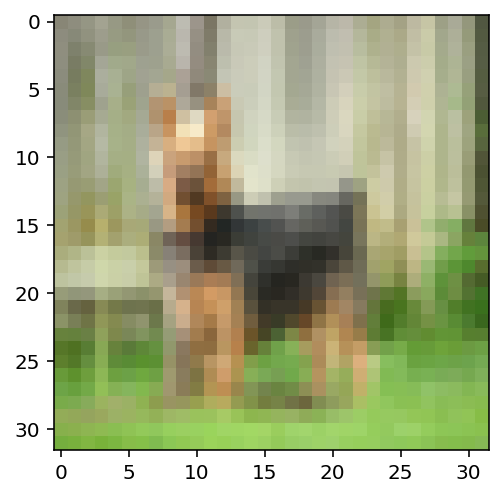

One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


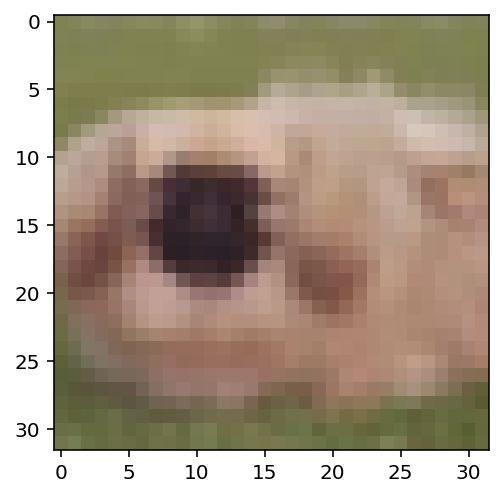

One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


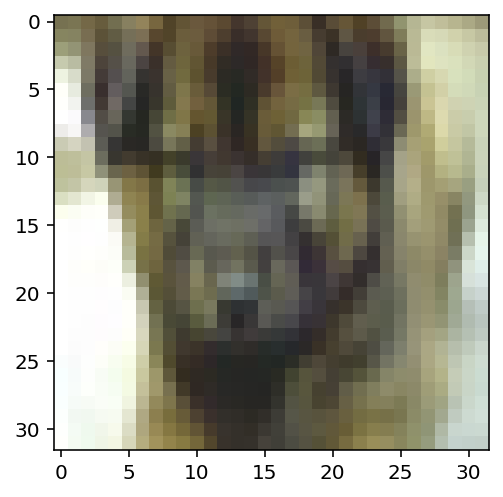

One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


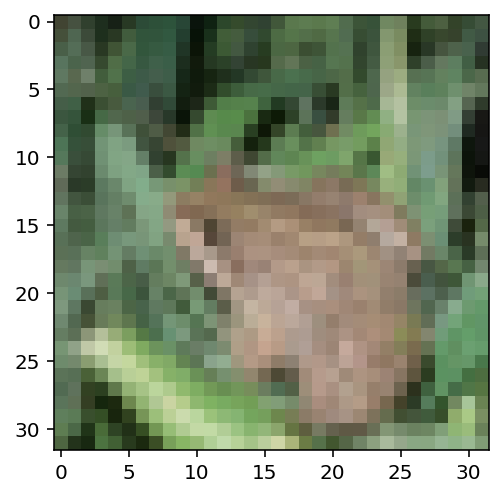

One-hot label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


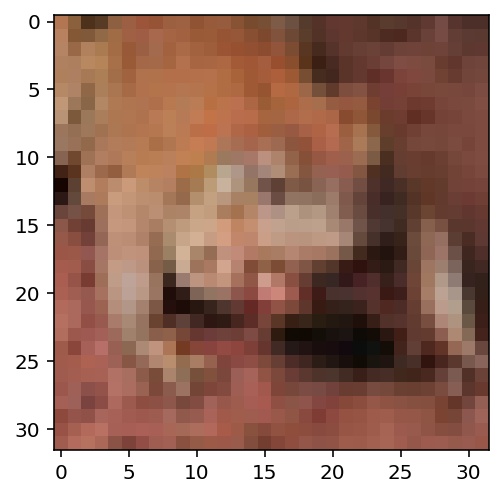

One-hot label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


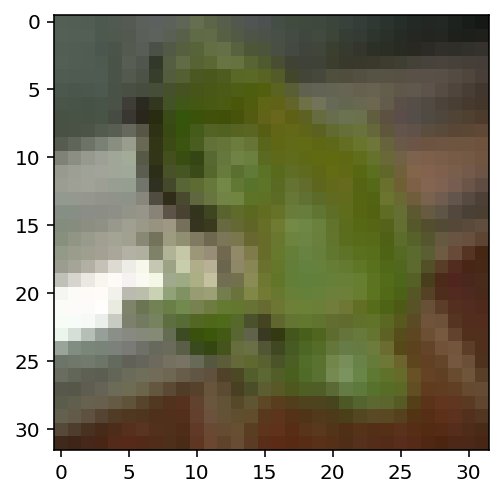

One-hot label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


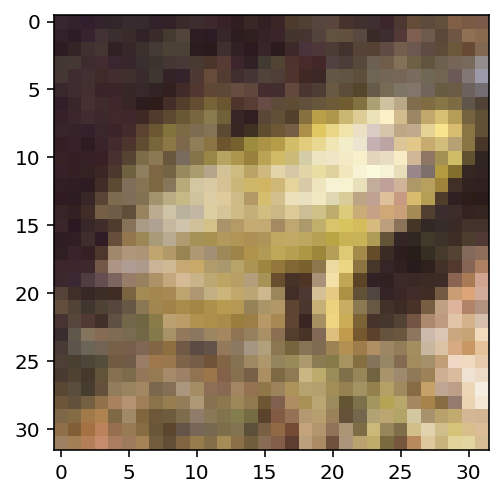

One-hot label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


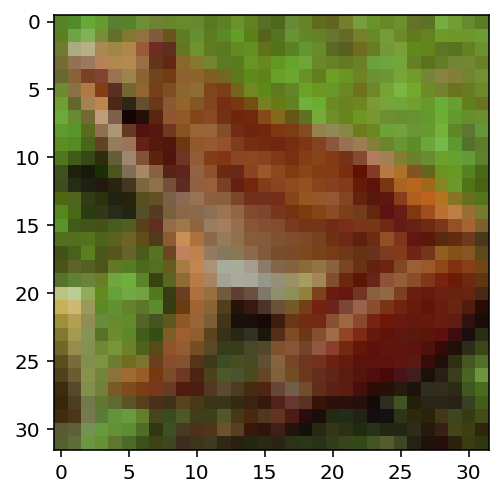

One-hot label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


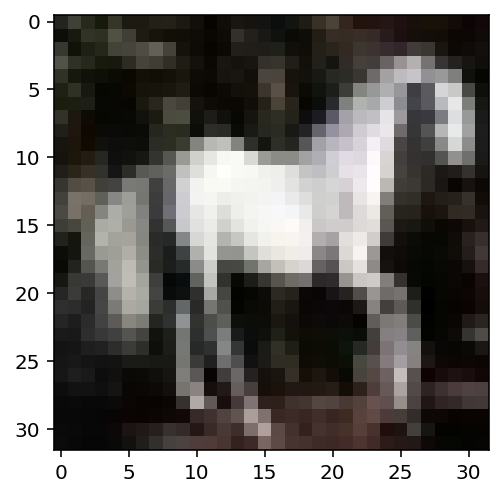

One-hot label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


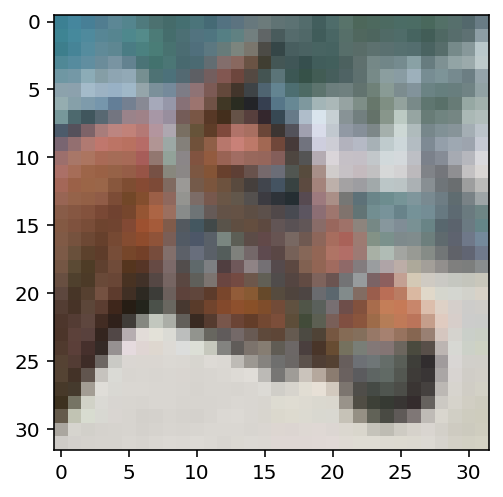

One-hot label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


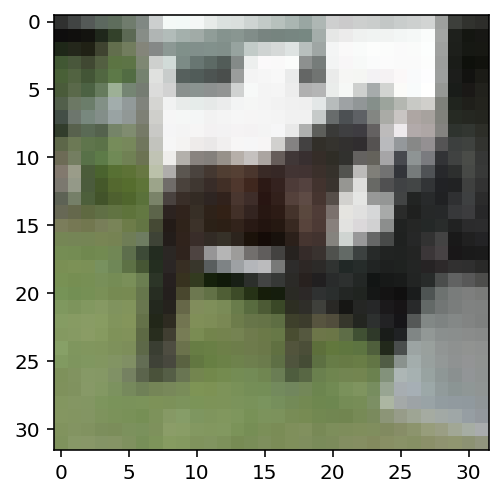

One-hot label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


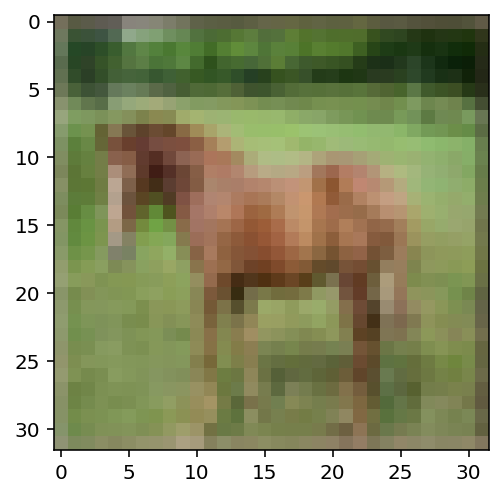

One-hot label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


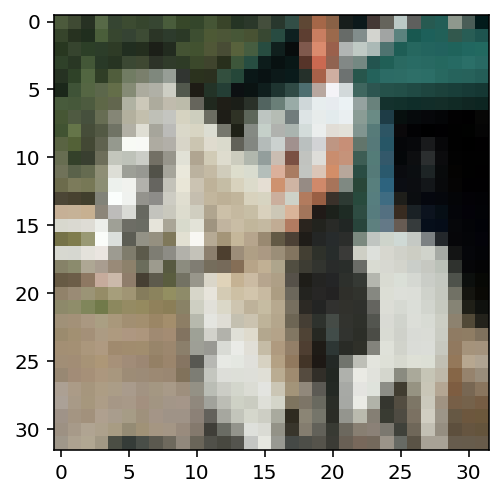

One-hot label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


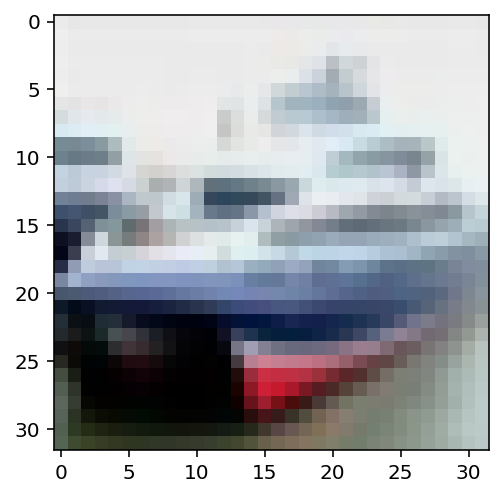

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


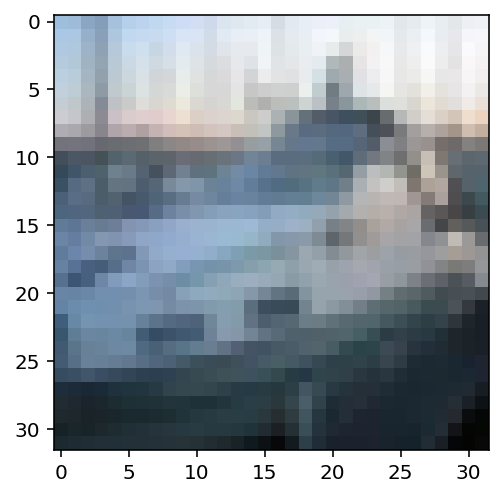

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


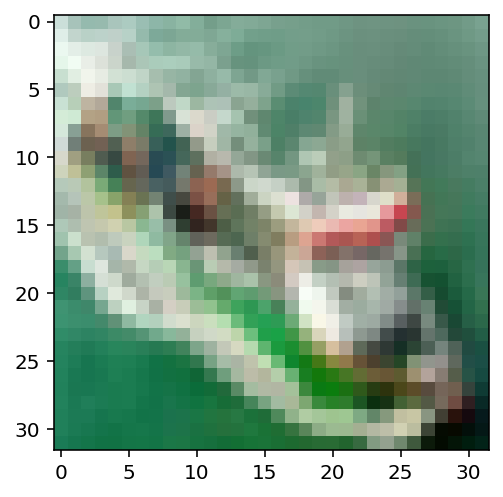

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


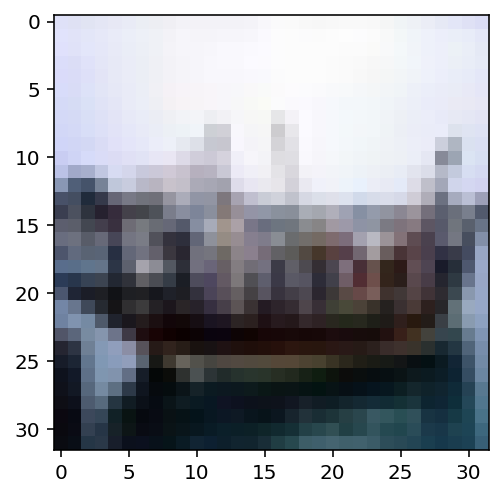

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


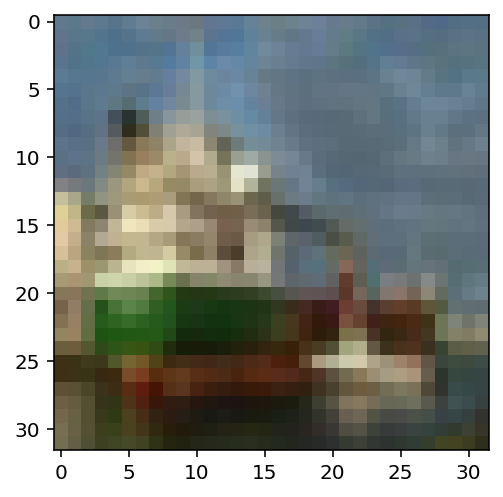

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


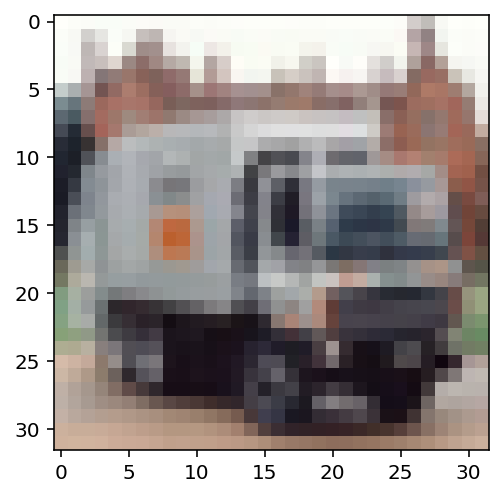

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


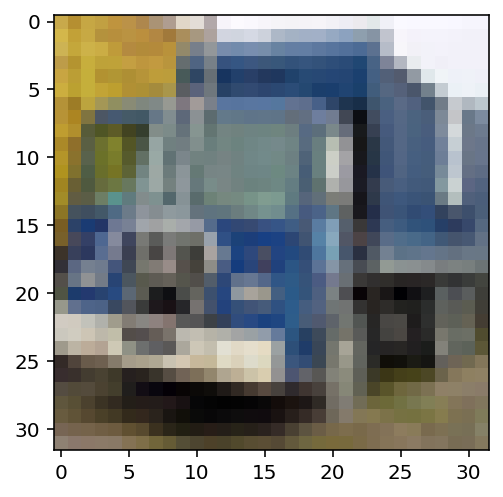

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


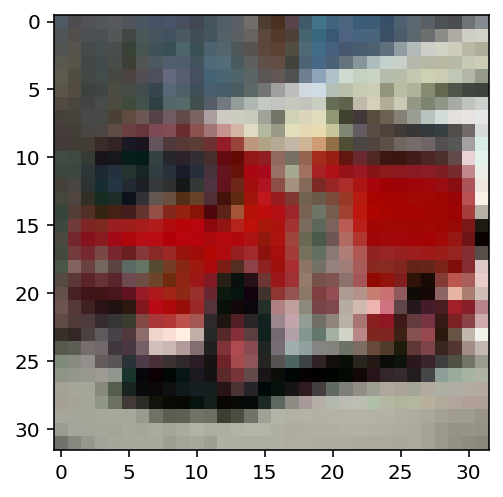

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


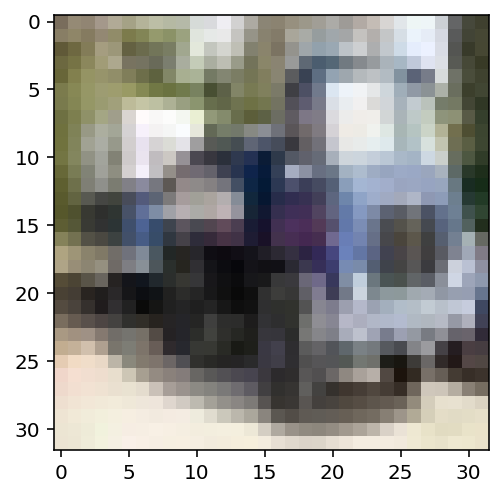

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


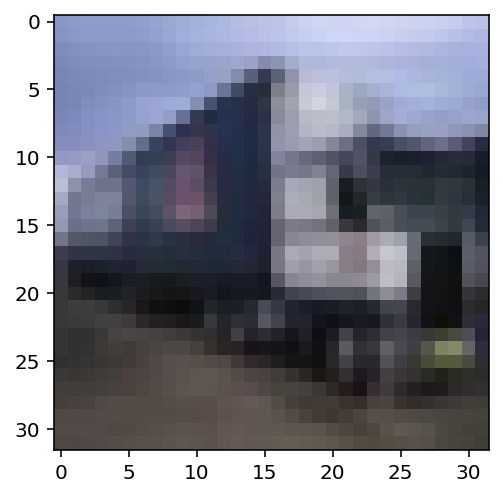

One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
for class_id in range(10):
  X_test = pickle.load(open(ROOT + f'/cifar/labeled/X_test_label{class_id}', mode='rb'))
  assert X_test.shape == (1000, 32, 32, 3)
  X_test.shape
  y_test = pickle.load(open(ROOT + f'/cifar/labeled/y_test_label{class_id}', mode='rb'))
  assert y_test.shape == (1000, 10)
  for i in range(5):
    curr_img = X_test[i, :]
    plt.imshow(curr_img)
    plt.show()
    print("One-hot label:", y_test[i, :])